In [37]:
from TextClass.ClassifierCv import ClassifierCv
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

## Text classification

In [11]:
text=['i am happy', 'i very friendly','you are happy', 'you are friendly','we are friendly', 'you are bad',
      'i am bad','i am unhappy','you are unhappy', 'we are unhappy']
category=['pos','pos','pos','pos','pos','neg','neg','neg','neg','neg']
data=pd.DataFrame({"text":text, "category":category})

In [12]:
data

,category,text
0,pos,i am happy
1,pos,i very friendly
2,pos,you are happy
3,pos,you are friendly
4,pos,we are friendly
5,neg,you are bad
6,neg,i am bad
7,neg,i am unhappy
8,neg,you are unhappy
9,neg,we are unhappy


#### initialize model object

In [38]:
cf_cv=ClassifierCv(data['category'],data['text'])

#### gridsearch

In [21]:
#model uses skleanr Pipeline object to process data
cf_cv.prepare_pipeline( [('vect', CountVectorizer()),
                          ('tfidf', TfidfTransformer()),
                          ('crf', MultinomialNB()) ])

param_dist = {'crf__alpha':[0.01, 0.02, 0.05, 0.07, 0.09]}

cf_cv.perform_random_search(param_dist)
cf_cv.print_top_random_search(3)

/home/ristohinno/text_class_env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ristohinno/text_class_env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ristohinno/text_class_env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ristohinno/text_class_env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, wa

Model with rank: 1
Mean validation score: 0.533 (std: 0.245)
Parameters: {'crf__alpha': 0.01}

Model with rank: 1
Mean validation score: 0.533 (std: 0.245)
Parameters: {'crf__alpha': 0.02}

Model with rank: 1
Mean validation score: 0.533 (std: 0.245)
Parameters: {'crf__alpha': 0.05}

Model with rank: 1
Mean validation score: 0.533 (std: 0.245)
Parameters: {'crf__alpha': 0.07}

Model with rank: 1
Mean validation score: 0.533 (std: 0.245)
Parameters: {'crf__alpha': 0.09}



/home/ristohinno/text_class_env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### train model

if plot_path and metric_path are not None metrics files and plots will be saved

/home/ristohinno/text_class_env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


MEDIAN
0    0.479167
dtype: float64
MEAN
0    0.479167
dtype: float64


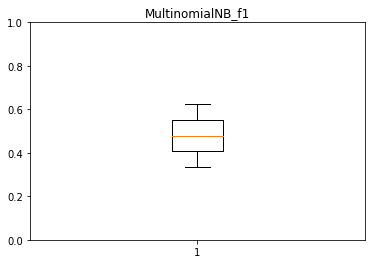

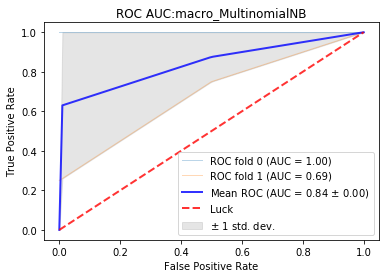

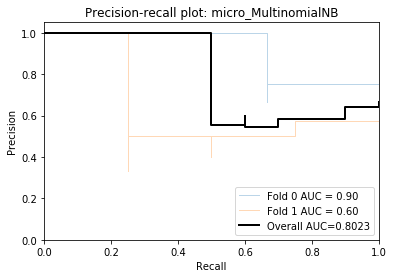

In [23]:
cf_cv.train_save_metrics([('vect', CountVectorizer()),
                          ('tfidf', TfidfTransformer()),
                          ('clf', MultinomialNB(alpha=.01)),], 
                         'f1', 
                         'MultinomialNB',
                        num_cv=2)

MEDIAN
pos    0.708333
neg    0.250000
dtype: float64
MEAN
pos    0.708333
neg    0.250000
dtype: float64


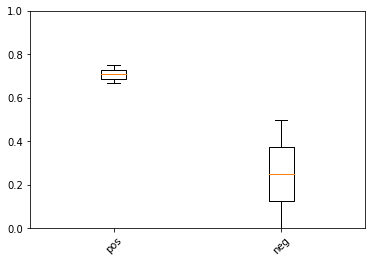

In [24]:
#per category metrics
cf_cv.make_metric_boxplot(metric='f1')

Confusion matrix, without normalization
[[5 0]
 [4 1]]


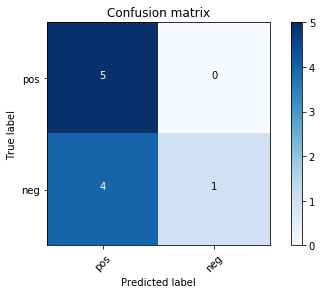

In [25]:
cf_cv.plot_confusion_matrix()

#### calculate accuracy using evaluation data

In [28]:
df_eval=pd.DataFrame({'text':['so good','very happy guy','very well unfriendly','it is bad'],
                     'category':['pos','pos','neg','neg']})

In [29]:
print(cf_cv.calc_evaluation_report(df_eval['text'], df_eval['category']))

             precision    recall  f1-score   support

        neg       0.50      0.50      0.50         2
        pos       0.50      0.50      0.50         2

avg / total       0.50      0.50      0.50         4



## Fasttext

Most models implemented are from sklearn package. Only one which is not is FastText. FastText takes text as an input. Otherwise usage is similar to previous.

In [34]:
from TextClass.FasttextClassifier import FasttextClassifier

In [35]:
#model uses skleanr Pipeline object to process data
cf_cv.prepare_pipeline( [('crf', FasttextClassifier()) ])

param_dist = {'crf__epoch':[2,3,4]}

cf_cv.perform_random_search(param_dist)
cf_cv.print_top_random_search(3)

Model with rank: 1
Mean validation score: 0.893 (std: 0.131)
Parameters: {'crf__epoch': 4}

Model with rank: 2
Mean validation score: 0.787 (std: 0.107)
Parameters: {'crf__epoch': 2}

Model with rank: 2
Mean validation score: 0.787 (std: 0.107)
Parameters: {'crf__epoch': 3}



MEDIAN
0    0.583333
dtype: float64
MEAN
0    0.583333
dtype: float64


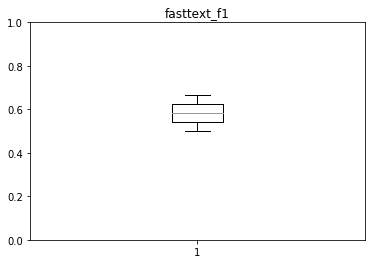

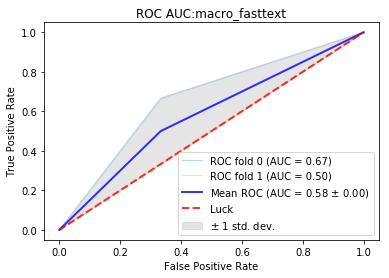

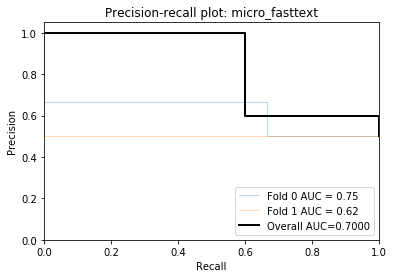

In [36]:
cf_cv.train_save_metrics([('clf', FasttextClassifier(epoch=4)),], 
                         'f1', 
                         'fasttext',
                        num_cv=2)